# YZV 311E DATA MINING PROJECT
# <strong>Detection Of Sucidal Texts</strong>
## Zehra Demir
## Nurbanu Gök

### Importing the necessary libraries

In [1]:
!pip install emoji
!pip install unidecode
!pip install clean-text
!pip install gensim

DEPRECATION: celery 5.2.0 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: celery 5.2.0 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: celery 5.2.0 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: celery 5.2.0 has a non-standard dependency specifier pytz>dev. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import numpy as np
import pandas as pd
import re
import emoji
from cleantext import clean
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('stopwords')
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zehra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zehra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zehra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zehra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the data file

In [3]:
df = pd.read_csv("data/Suicide_Detection_50k.csv")

In [4]:
df.head()


,text,class
0,How do you shower? May you tell me how you sho...,non-suicide
1,How do I prevent suicide before it even starts...,suicide
2,Suicidal ThoughtsI haven't gone 1 day without ...,suicide
3,"Ignore, just checkin somethin' Just checking i...",non-suicide
4,i’m a busy man 😂😂😂😂😂😂😂😂 jk all i do is go on r...,non-suicide


In [5]:
df.shape

(50000, 2)

## Data Preprocessing

In [6]:
df.isna().sum()

text     0
class    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

text     object
class    object
dtype: object

### Some work has been done when reducing the data set to be able to fit it in GitHub repository. This is why we do not have any null or duplicate values now. You can find the details in data_reducing.ipynb file.

### We can now proceed with the text preprocessing part.

## Text Preprocessing

### Remove URLs etc.

In [9]:
def clean(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions/handles
    return text
df['text'] = df['text'].apply(clean)

### Lowercasing the text data

In [10]:
df['text'] = df['text'].str.lower()

### Emoji and Emoticon Handling

#### Converting the emojis

In [11]:
def convert_emojis_to_text(text):
    return emoji.demojize(text)

#df['text'] = df['text'].apply(convert_emojis_to_text)

#### ... or removing the emojis (which we choosed to keep data more accurate)

In [12]:
from cleantext import clean

In [13]:
def clean_emojis(text):

    return clean(text, no_emoji=True)

df['text'] = df['text'].apply(clean_emojis)

In [14]:
df.head()

,text,class
0,how do you shower? may you tell me how you sho...,non-suicide
1,how do i prevent suicide before it even starts...,suicide
2,suicidal thoughtsi haven't gone 1 day without ...,suicide
3,"ignore, just checkin somethin' just checking i...",non-suicide
4,i'm a busy man jk all i do is go on reddit,non-suicide


### Remove Punctuations

In [15]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df["text"] = df["text"].apply(remove_punctuation)

### Remove Stop Words

In [16]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_stopwords)

In [17]:
df.head()

,text,class
0,shower may tell shower step step please im wei...,non-suicide
1,prevent suicide even startsi headed towards co...,suicide
2,suicidal thoughtsi havent gone 1 day without t...,suicide
3,ignore checkin somethin checking alt enough ka...,non-suicide
4,im busy man jk go reddit,non-suicide


### Lemmatization

In [18]:
wnl = WordNetLemmatizer()

def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

lemmatize_words("programmed programmers programming")

df["text"] = df["text"].apply(lemmatize_words)

## Splitting Data

We split data into two parts: train and test. 80% part of the data belongs to train part.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

In [20]:
print(f"Shape of the train dataset: {X_train.shape, y_train.shape}")
print(f"Shape of the test dataset: {X_test.shape, y_test.shape}")

Shape of the train dataset: ((40000,), (40000,))
Shape of the test dataset: ((10000,), (10000,))


## Vectorizing the Data

### We used two approaches for vectorization:

## word2vec

In [21]:
# Tokenize the text data
tokenized_text = X_train.apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4 )

In [22]:
def document_vectorizer(doc, model):
    doc_vector = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    return np.mean(doc_vector, axis=0) if doc_vector else np.zeros(model.vector_size)

# Apply the function to train and test data
X_train_w2v = tokenized_text.apply(lambda x: document_vectorizer(x, word2vec_model))
X_test_w2v = X_test.apply(lambda x: document_vectorizer(x.split(), word2vec_model))

## Starting to the Methods

## Random Forest Classifier

In [23]:
# Train RandomForest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(list(X_train_w2v), y_train)

# Make Predictions and Evaluate
y_pred_w2v = rf_classifier.predict(list(X_test_w2v))
accuracy = accuracy_score(y_test, y_pred_w2v)

print(f'Test Accuracy for Random Forest: {accuracy}')

Test Accuracy for Random Forest: 0.899


### Hyperparameter tuning for RandomForest

#### Randomized Search for the RandomForest model with word2vec

In [24]:
# Taking a small subset for faster experimentation
df_subset = df.sample(frac=0.2, random_state=42)

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(df_subset['text'], df_subset['class'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenized_text = X_train_small.apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create a function to get the vector representation for each document
def document_vectorizer(doc, model):
    doc_vector = [model.wv[word] for word in doc if word in model.wv.index_to_key]
    return np.mean(doc_vector, axis=0) if doc_vector else np.zeros(model.vector_size)

# Apply the function to train and test data
X_train_w2v_small = tokenized_text.apply(lambda x: document_vectorizer(x, word2vec_model))
X_test_w2v_small = X_test_small.apply(lambda x: document_vectorizer(x.split(), word2vec_model))

# Hyperparameter tuning for RandomForest using RandomizedSearchCV
param_dist_rf = {
    'n_estimators':[100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'max_samples': [None, 0.5, 0.75, 1.0]   
}

rf_classifier = RandomForestClassifier(random_state=42)

randomized_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
randomized_search_rf.fit(list(X_train_w2v_small), y_train_small)

# Get best parameters for RandomForest
best_params_rf = randomized_search_rf.best_params_
best_model_rf = randomized_search_rf.best_estimator_

# Evaluate on the test set
y_test_pred_rf = best_model_rf.predict(list(X_test_w2v_small))
accuracy_test_rf = accuracy_score(y_test_small, y_test_pred_rf)

print(f'Best Parameters for RandomForest: {best_params_rf}')
print(f'Test Accuracy for RandomForest: {accuracy_test_rf}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Test Accuracy for RandomForest: 0.881


Applied randomized search a small part of the data because the dataset was too large. It was taking hours to for whole dataset. After that, I tried different combinations of best parameters for the whole train data, manually.

In [77]:
rf_classifier_tuned = RandomForestClassifier(random_state=42, n_estimators=250, min_samples_split= 5,  min_impurity_decrease=0, max_features= "log2", min_samples_leaf=1, max_depth=None, n_jobs=-1, criterion = "entropy",  verbose=1)
rf_classifier_tuned.fit(list(X_train_w2v), y_train)

# Make Predictions and Evaluate
y_pred_w2v_tuned = rf_classifier_tuned.predict(list(X_test_w2v))
accuracy = accuracy_score(y_test, y_pred_w2v_tuned)

print(f'Test Accuracy for Random Forest (best parameters): {accuracy}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.1s


Test Accuracy for Random Forest (best parameters): 0.9018


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 250 out of 250 | elapsed:    0.0s finished


After randomized search and trying different parameter combinations, the highest accuracy value was 0.9026 for:

- random_state=42,
- n_estimators=350,
- min_samples_split= 10, 
- min_impurity_decrease=0, 
- max_features= "log2",
- min_samples_leaf=1,
- max_depth=None,
- n_jobs=-1, 
- criterion = "entropy"

### Confusion Matrix

In [72]:
# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_w2v_tuned)
class_report_tfidf = classification_report(y_test, y_pred_w2v_tuned)
print('Confusion Matrix (word2vec):')
print(conf_matrix_tfidf)
print('\nClassification Report (word2vec):')
print(class_report_tfidf)

Confusion Matrix (word2vec):
[[4091  953]
 [ 566 4390]]

Classification Report (word2vec):
              precision    recall  f1-score   support

 non-suicide       0.88      0.81      0.84      5044
     suicide       0.82      0.89      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Gaussian Naive Bayes

In here, gaussian naive bayes is suitable for our task, because word2vec returns continous values which can be negative.

In [27]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(list(X_train_w2v), y_train)

# Make predictions and evaluate
y_pred_w2v = nb_classifier.predict(list(X_test_w2v))
accuracy = accuracy_score(y_test, y_pred_w2v)

print(f'Test Accuracy for Naive Bayes: {accuracy}')

Test Accuracy for Naive Bayes: 0.8481


### Hyperparameter tuning for Gaussian Naïve Bayes model(word2vec)

#### Randomized Search for the Gaussian Naïve Bayes  model with word2vec

In [28]:
from scipy.stats import uniform

param_dist_nb = {
    'var_smoothing': uniform(1e-9, 1e-7)
}

nb_classifier = GaussianNB()

random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist_nb, n_iter=10, cv=5, random_state=42)
random_search.fit(list(X_train_w2v), y_train)

print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for prediction
best_model = random_search.best_estimator_
y_pred_w2v_tuned = best_model.predict(list(X_test_w2v))

Best Hyperparameters: {'var_smoothing': 3.845401188473625e-08}


In [29]:
accuracy = accuracy_score(y_test, y_pred_w2v_tuned)

print(f'Test Accuracy for Gaussian Naive Bayes (best parameters): {accuracy}')

Test Accuracy for Gaussian Naive Bayes (best parameters): 0.8481


### Confusion Matrix

In [73]:
# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_w2v_tuned)
class_report_tfidf = classification_report(y_test, y_pred_w2v_tuned)
print('Confusion Matrix for Naive Bayes(word2vec):')
print(conf_matrix_tfidf)
print('\nClassification Report (word2vec):')
print(class_report_tfidf)

Confusion Matrix for Naive Bayes(word2vec):
[[4091  953]
 [ 566 4390]]

Classification Report (word2vec):
              precision    recall  f1-score   support

 non-suicide       0.88      0.81      0.84      5044
     suicide       0.82      0.89      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## TF - IDF

In [31]:
# Convert text data to numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)

(40000, 67068)


## Random Forest

### Hyperparameter tuning for the RandomForest model (TF-IDF)

In [32]:
rf_classifier_tfidf = RandomForestClassifier(random_state=42)
rf_classifier_tfidf.fit(X_train_tfidf, y_train)

# Make Predictions and Evaluate
y_pred_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_tfidf)
print(f'Test Accuracy for Random Forest: {accuracy}')

Test Accuracy for Random Forest: 0.8931


The accuracy for RandomForest with TF-IDF without hyperparameter tuning is 0.8931.

In [33]:
param_dist_rf_tfidf = {
    'n_estimators':[150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    
}

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

rf_classifier_tfidf = RandomForestClassifier(random_state=42)

random_search_rf_tfidf = RandomizedSearchCV(rf_classifier_tfidf, param_distributions=param_dist_rf_tfidf, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search_rf_tfidf.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [150, 200, 250, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [34]:
best_params_rf_tfidf = random_search_rf_tfidf.best_params_
best_model_rf_tfidf = random_search_rf_tfidf.best_estimator_

print(f'Best Parameters for RandomForest: {best_params_rf_tfidf}')

Best Parameters for RandomForest: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [35]:
# Evaluate on the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)
y_test_pred_rf_tfidf = best_model_rf_tfidf.predict(X_test_tfidf)
accuracy_test_rf_tfidf = accuracy_score(y_test, y_test_pred_rf_tfidf)

print(f'Test Accuracy for RandomForest: {accuracy_test_rf_tfidf}')

Test Accuracy for RandomForest: 0.8882


I will use these best parameters to tune the model manually.

In [36]:
best_rf= RandomForestClassifier(random_state=42, n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features='sqrt', criterion='entropy', n_jobs = -1, verbose=1)

I could not reach a higher accuracy with Hyperparameter tuning for the RandomForest model with TF-IDF. As a result of that I decide to move with word2vec for RandomForest
 

#### The best model with RandomForest 

The highest accuracy is achieved by the Random Forest model with Word2Vec vectorization. We will use this model for deployment.

## Multinomial Naive Bayes

This time multinomial naive bayes is suitable for our task, because tf-idf returns discrete non-negative values.

In [37]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
y_pred_tfidf = nb_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_tfidf)

print(f'Test Accuracy for Naive Bayes: {accuracy}')

Test Accuracy for Naive Bayes: 0.8588


### Hyperparameter tuning for the Gaussian Naïve Bayes model (TF-IDF)

In [38]:
from scipy.stats import loguniform

param_dist_nb = {
    'alpha': loguniform(1e-4, 1e0),
    'fit_prior': [True, False]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    nb_classifier, param_distributions=param_dist_nb,
    n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the randomized search to the data
random_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'alpha': 0.06796578090758153, 'fit_prior': False}


In [39]:
best_nb_classifier = random_search.best_estimator_
test_accuracy = best_nb_classifier.score(X_test_tfidf, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Test Accuracy with Best Hyperparameters: 0.9016


### Confusion Matrix

In [74]:
# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_w2v_tuned)
class_report_tfidf = classification_report(y_test, y_pred_w2v_tuned)
print('Confusion Matrix for Naive Bayes (tf-idf):')
print(conf_matrix_tfidf)
print('\nClassification Report (tf-idf):')
print(class_report_tfidf)

Confusion Matrix for Naive Bayes (tf-idf):
[[4091  953]
 [ 566 4390]]

Classification Report (tf-idf):
              precision    recall  f1-score   support

 non-suicide       0.88      0.81      0.84      5044
     suicide       0.82      0.89      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Additional Tries in Searching for Better Models

### Since we get better results in TF-IDF, next algorithms will be trained and tested only on TF-IDF vectorized data.

## XGBoost

In [41]:
from xgboost import XGBClassifier

# it needs labels in [0, 1] for classification so let's convert them
y_train_xgb = y_train.replace("suicide", 1)
y_train_xgb = y_train_xgb.replace("non-suicide", 0)
y_test_xgb = y_test.replace("suicide", 1)
y_test_xgb = y_test_xgb.replace("non-suicide", 0)
y_train_xgb.head()

39087    0
30893    1
45278    1
16398    1
13653    0
Name: class, dtype: int64

In [42]:
xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier.fit(X_train_tfidf, y_train_xgb)

y_pred_tfidf = xgb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_xgb, y_pred_tfidf)

print(f'Test Accuracy for XGBoost: {accuracy}')

Test Accuracy for XGBoost: 0.9085


### Hyperparameter Tuning for the XGBoost Model (TF-IDF)

In [43]:
param_dist_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist_xgb,
    n_iter=3, 
    scoring='accuracy',
    cv=5,  
    verbose=2, 
    n_jobs=-1,  
    random_state=42, 
)

random_search.fit(X_train_tfidf, y_train_xgb)

# Print the best parameters 
print("Best Hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [44]:
best_xgb_model = random_search.best_estimator_
test_accuracy = best_xgb_model.score(X_test_tfidf, y_test_xgb)
print("Test Accuracy for XGBoost (best parameters):", test_accuracy)

Test Accuracy for XGBoost (best parameters): 0.8998


### Confusion Matrix

In [75]:
# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_w2v_tuned)
class_report_tfidf = classification_report(y_test, y_pred_w2v_tuned)
print('Confusion Matrix for XGBoost (tf-idf):')
print(conf_matrix_tfidf)
print('\nClassification Report (tf-idf):')
print(class_report_tfidf)

Confusion Matrix for XGBoost (tf-idf):
[[4091  953]
 [ 566 4390]]

Classification Report (tf-idf):
              precision    recall  f1-score   support

 non-suicide       0.88      0.81      0.84      5044
     suicide       0.82      0.89      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



##  K-Nearest Neighbors (KNN) 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=8)

knn_classifier.fit(X_train_tfidf, y_train)

y_pred_tfidf = knn_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_tfidf)

print(f'Test Accuracy for KNN: {accuracy}')

Test Accuracy for KNN: 0.5056


### Hyperparameter Tuning for KNN (TF-IDF)

In [47]:
from scipy.stats import randint

param_dist = {
    'n_neighbors': randint(8, 12), 
    'weights': ['uniform'],
    'p': [2] 
}

random_search = RandomizedSearchCV(
    knn_classifier,
    param_distributions=param_dist,
    n_iter=1,  
    cv=5,
    scoring='accuracy',  
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [48]:
best_knn_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_knn_model.predict(X_test_tfidf)

# Calculate accuracy or other metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5051


### Confusion Matrix

In [76]:
# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tuned)
class_report_tfidf = classification_report(y_test, y_pred_tuned)
print('Confusion Matrix for KNN (tf-idf):')
print(conf_matrix_tfidf)
print('\nClassification Report (tf-idf):')
print(class_report_tfidf)

Confusion Matrix for KNN (tf-idf):
[[5043    1]
 [4948    8]]

Classification Report (tf-idf):
              precision    recall  f1-score   support

 non-suicide       0.50      1.00      0.67      5044
     suicide       0.89      0.00      0.00      4956

    accuracy                           0.51     10000
   macro avg       0.70      0.50      0.34     10000
weighted avg       0.70      0.51      0.34     10000



## Input Function

### Preprocessor function for inputs

The main steps for cleaning and preprocess. For now, the vectorizer is tf-idf because it is much faster.

In [50]:
def preprocess(text):
    text = clean(text)
    text = text.lower()
    text = clean_emojis(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize_words(text)
    text = tfidf_vectorizer.transform([text])
    #text = text.apply(lambda x: document_vectorizer(x.split(), word2vec_model))
    
    return text

You can play with demo by changing classifier.

In [55]:
def demo(test_input):
    # Take input from user
    print('Enter a sentence to test: ', test_input) 
    preprocessed_input = preprocess(test_input) 
    predict = xgb_classifier.predict(preprocessed_input) 
    if predict[0] == 1:
        print('Prediction Result : ', predict[0])
        print('The given sentence is suicidal.')
    elif predict[0] == 0:
        print('Prediction Result : ', predict[0])
        print('The given sentence is not suicidal.')
    else:
        print('Prediction Result : ', predict[0])

In [56]:
demo("I am feeling very sad today, I don't know what to do, maybe I should just tell my friend about it. But does he even care? Nobody actually cares. I am just a waste of space. I am better off dead.")
demo("Today is the big day! I am so excited to meet my friends after so long. I am going to have so much fun. I just missed them so much. Maybe we order pizza and watch a movie together. I am so excited!")

Enter a sentence to test:  I am feeling very sad today, I don't know what to do, maybe I should just tell my friend about it. But does he even care? Nobody actually cares. I am just a waste of space. I am better off dead.
Prediction Result :  1
The given sentence is suicidal.
Enter a sentence to test:  Today is the big day! I am so excited to meet my friends after so long. I am going to have so much fun. I just missed them so much. Maybe we order pizza and watch a movie together. I am so excited!
Prediction Result :  0
The given sentence is not suicidal.


### Note: Some problems are using words like "feel", "I" started sentences, on the other hand, food names have positive effect. The way that length of the sentence affects the result is dangerous. 

# Best Model for Demo

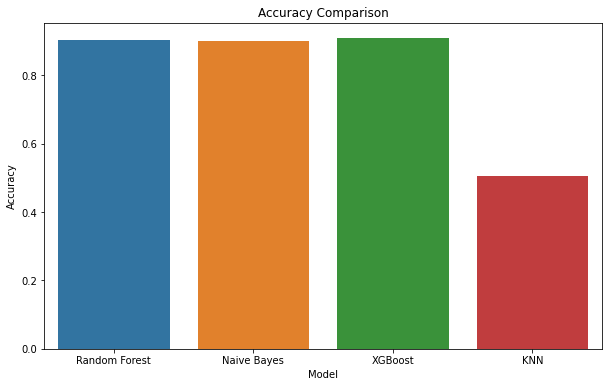

In [79]:
models = ['Random Forest', 'Naive Bayes', 'XGBoost', 'KNN']
accuracies = [0.9018, 0.9016, 0.9085, 0.5056]

plt.figure(figsize=(10, 6))
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
sns.barplot(x=models, y=accuracies)
plt.show()

## Save Best Model

## XGBoost

In [58]:
y_pred_tfidf = xgb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_xgb, y_pred_tfidf)

print(f'Test Accuracy for XGBoost: {accuracy}')

Test Accuracy for XGBoost: 0.9085


In [59]:
joblib.dump(xgb_classifier, 'best_xgb_model.joblib')

['best_xgb_model.joblib']

In [60]:
loaded_model = joblib.load('best_xgb_model.joblib')

In [64]:
y_pred_tfidf = loaded_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test_xgb, y_pred_tfidf)
print(f'Test Accuracy for XGBoost: {accuracy}')

Test Accuracy for XGBoost: 0.9085


## ROC-AUC Curve of the Best Model

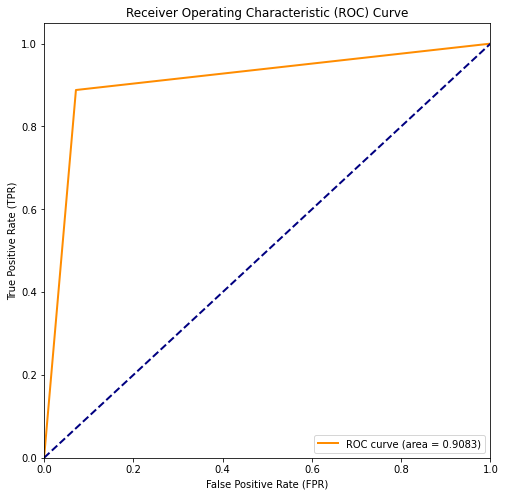

In [69]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_xgb, y_pred_tfidf)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [71]:
class_report_tfidf = classification_report(y_test_xgb, y_pred_tfidf)
print('\nClassification Report (tf-idf):')
print(class_report_tfidf)


Classification Report (tf-idf):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5044
           1       0.92      0.89      0.91      4956

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



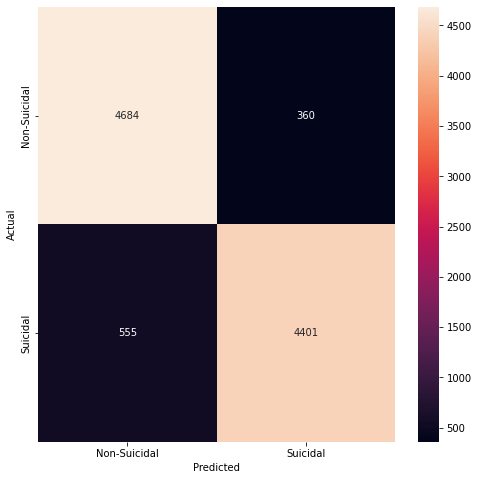

In [70]:
conf_mat = confusion_matrix(y_test_xgb, y_pred_tfidf)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Non-Suicidal', 'Suicidal'], yticklabels=['Non-Suicidal', 'Suicidal'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()